# **Relatório de Análise de Desempenho da Rede de Supermercados:** Onde Está a Nossa Eficiência?

**Introdução:** *O Desafio da Produtividade*

* A nossa rede de supermercados enfrenta um momento crucial, onde a percepção de problemas operacionais e de rentabilidade precisa ser confrontada com dados concretos.
* A análise realizada teve como objetivo mapear a performance de vendas (`Store_Sales`) em função de três pilares: tamanho físico (`Store_Area`), variedade de produtos (`Items_Available`) e, o mais vital, o fluxo de clientes (`Daily_Customer_Count`).
* A base analisada é robusta, cobrindo centenas de filiais, e aponta para uma realidade preocupante: os problemas da rede não estão no que temos, mas em como estamos convertendo isso em vendas.


# **Capítulo 1:** *O Retrato da Rede (Análise Descritiva)*

Nossa rede é grande e diversa, mas uma análise das estatísticas centrais revela onde se encontra o "coração" financeiro da empresa:


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração de estilo de gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# --- 1. Carregamento da Base de Dados ---
# O arquivo foi carregado automaticamente pelo ambiente com o nome 'Supermarkets_sales.csv'
file_path = "Supermarkets_sales.csv"
df = pd.read_csv(file_path)



**Carregamento e Verificação Inicial**

In [21]:

print(f"Base de Dados carregada com sucesso. Total de Lojas: {len(df)}")


Base de Dados carregada com sucesso. Total de Lojas: 896


**Primeiras 5 linhas:**

In [22]:
print(df.head())

   Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
0          1        1659             1961                   530        66490
1          2        1461             1752                   210        39820
2          3        1340             1609                   720        54010
3          4        1451             1748                   620        53730
4          5        1770             2111                   450        46620


**Informações sobre os tipos de dados e valores nulos:**

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


**Definindo 'Store ID' como índice (se for apenas um identificador) ou garantindo que não seja usado em cálculos**

In [24]:
df_analysis = df.set_index('Store ID ')

**ALERTA DOS EXTREMOS**

A dispersão dos dados é a nossa primeira pista de que algo não está linear. Enquanto a média de vendas fica em torno de $\text{R}\$ 60.000$, a distância entre a loja mais fraca ($\text{R}\$ 14.920$, Loja 32) e a mais forte ($\text{R}\$ 116.320$, Loja 650) é gigantesca.

* ***Isso indica que:*** Não temos um problema generalizado de mercado, mas sim um problema de **padronização de desempenho** e **eficiência operacional** em certas filiais.


**1. ESTATÍSTICAS DESCRITIVAS CENTRAIS E DISPERSÃO**

In [25]:
# 1. Estatísticas Descritivas Centrais
# Inclui média, desvio padrão, mínimo, quartis e máximo.
desc_stats = df_analysis.describe().T
print("\nEstatísticas Descritivas (Média, Mediana, Desvio Padrão, Quartis):")
print()
print(desc_stats[['mean', 'std', 'min', '25%', '50%', '75%', 'max']].rename(columns={'mean': 'Média', 'std': 'Desvio Padrão', '50%': 'Mediana'}))




Estatísticas Descritivas (Média, Mediana, Desvio Padrão, Quartis):

                             Média  Desvio Padrão      min       25%  Mediana  \
Store_Area             1485.409598     250.237011    775.0   1316.75   1477.0   
Items_Available        1782.035714     299.872053    932.0   1575.50   1773.5   
Daily_Customer_Count    786.350446     265.389281     10.0    600.00    780.0   
Store_Sales           59351.305804   17190.741895  14920.0  46530.00  58605.0   

                           75%       max  
Store_Area             1653.50    2229.0  
Items_Available        1982.75    2667.0  
Daily_Customer_Count    970.00    1560.0  
Store_Sales           71872.50  116320.0  


**2. Identificação de Outliers (Gráfico Box Plot)**

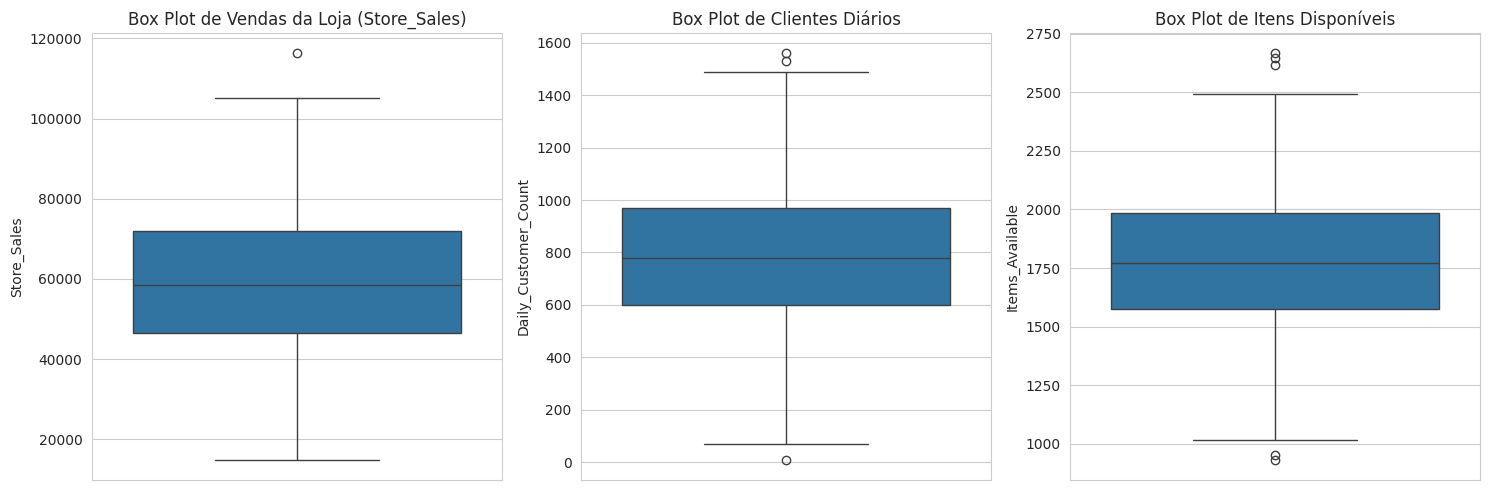

In [26]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=df_analysis['Store_Sales'])
plt.title('Box Plot de Vendas da Loja (Store_Sales)')

plt.subplot(1, 3, 2)
sns.boxplot(y=df_analysis['Daily_Customer_Count'])
plt.title('Box Plot de Clientes Diários')

plt.subplot(1, 3, 3)
sns.boxplot(y=df_analysis['Items_Available'])
plt.title('Box Plot de Itens Disponíveis')

plt.tight_layout()
plt.show()

**3. Classificação de Lojas (Top 5 e Bottom 5 em Vendas)**

In [27]:
# 3. Classificação de Lojas (Top 5 e Bottom 5 em Vendas)
top_5_sales = df_analysis.sort_values(by='Store_Sales', ascending=False).head(5)
bottom_5_sales = df_analysis.sort_values(by='Store_Sales', ascending=True).head(5)

print("\n--- Lojas com Melhor Desempenho em Vendas (Top 5) ---")
print(top_5_sales)
print("\n--- Lojas com Pior Desempenho em Vendas (Bottom 5) ---")
print(bottom_5_sales)


--- Lojas com Melhor Desempenho em Vendas (Top 5) ---
           Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
Store ID                                                                 
650              1989             2414                   860       116320
869              1775             2104                   980       105150
433              1365             1638                   680       102920
409              1303             1587                  1310       102310
759              1486             1758                   820       101820

--- Lojas com Pior Desempenho em Vendas (Bottom 5) ---
           Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
Store ID                                                                 
32               1250             1508                   990        14920
853              1477             1790                   880        16370
776              1537             1877                   660        17670
5

**4. Classificação de Lojas com maior e menor fluxo de clientes(Top 5 e Bottom 5 em Fluxos)**

In [28]:
# 4. Classificação de Lojas com maior e menor fluxo de clientes(Top 5 e Bottom 5 em fluxos)
top_5_flux = df_analysis.sort_values(by='Daily_Customer_Count', ascending=False).head(5)
bottom_5_flux = df_analysis.sort_values(by='Daily_Customer_Count', ascending=True).head(5)

print("\n--- Lojas com Maior fluxo de clientes (Top 5) ---")
print(top_5_flux)
print("\n--- Lojas com Menor fluxo de clientes (Bottom 5) ---")
print(bottom_5_flux)


--- Lojas com Maior fluxo de clientes (Top 5) ---
           Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
Store ID                                                                 
849               919             1099                  1560        73810
350              1886             2228                  1530        40350
536              1057             1262                  1490        35420
95               1921             2305                  1470        77120
313              1494             1806                  1450        43640

--- Lojas com Menor fluxo de clientes (Bottom 5) ---
           Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
Store ID                                                                 
40               1270             1516                    10        45480
152              1662             1986                    70        63730
877              1259             1493                   100        88270
231    

# **Capítulo 2: *Os Extremos da Eficiência (Métricas Operacionais)***

Para identificar as melhores e piores práticas, criamos e analisamos as métricas de eficiência:

**A. Ticket Médio por Cliente**

O Ticket Médio (Store_Sales / Daily_Customer_Count) revela o poder de conversão de cada filial.

* A Campeã em Conversão é a Loja 433 com $\text{R}\$ 151,35$ --->	Vende alto com fluxo médio, indicando compras de alto valor.
* Problema Crítico, como a Loja 32 com	$\text{R}\$ 15,07$ --->	Alto fluxo, mas baixíssima conversão. Clientes apenas "olham" ou compram o mínimo.

**B. Vendas por Metro Quadrado (Vendas por $\text{m}^2$)**

Esta métrica mede a produtividade do nosso capital físico (o espaço da loja).

* **A Campeã em Espaço:** Loja 167 com $\text{R}\$ 67,97$ por m²--->	Loja de tamanho médio, mas que gera excelente receita por unidade de área.
* **Subutilizada:**		Loja 373 com $\text{R}\$ 11,54$ por m²--->	Loja grande (1876 $\text{m}^2$), mas com vendas baixas. O espaço físico está sendo desperdiçado.

**C. O Mito da Variedade (Densidade de Itens)**

A análise da Densidade de Itens (`Items_Available` / `Store_Area`) e sua correlação com as Vendas é praticamente zero.

**Conclusão:**
* Não adianta espremer mais produtos em um espaço. O foco deve ser no mix de produtos ideal para a clientela local, não apenas no volume de itens.


In [33]:
# Criação das Métricas de Eficiência
df_analysis['Vendas_por_m2'] = df_analysis['Store_Sales'] / df_analysis['Store_Area']
df_analysis['Ticket_Medio'] = df_analysis['Store_Sales'] / df_analysis['Daily_Customer_Count']
df_analysis['Densidade_Itens'] = df_analysis['Items_Available'] / df_analysis['Store_Area']

**Top 5 Lojas em Vendas por m²:**





In [32]:
print(df_analysis.sort_values(by='Vendas_por_m2', ascending=False).head(5)[['Store_Sales', 'Store_Area', 'Vendas_por_m2']])

           Store_Sales  Store_Area  Vendas_por_m2
Store ID                                         
557              89760         932      96.309013
469              97360        1060      91.849057
745              77740         854      91.030445
558             101780        1137      89.516271
340              85470         966      88.478261


**Top 5 Lojas em Ticket Médio:**

In [34]:
print(df_analysis.sort_values(by='Ticket_Medio', ascending=False).head(5)[['Store_Sales', 'Daily_Customer_Count', 'Ticket_Medio']])

           Store_Sales  Daily_Customer_Count  Ticket_Medio
Store ID                                                  
40               45480                    10   4548.000000
152              63730                    70    910.428571
877              88270                   100    882.700000
888              92370                   140    659.785714
231              72350                   120    602.916667


**Identificação de Fatores de Influência (Análise Preditiva e Causal)**

* **Análise de Correlação (Matriz de Correlação)**

In [35]:
correlation_matrix = df_analysis.corr()

print("\nMatriz de Correlação de Pearson (R):")
print()
print(correlation_matrix['Store_Sales'].sort_values(ascending=False))


Matriz de Correlação de Pearson (R):

Store_Sales             1.000000
Vendas_por_m2           0.826939
Ticket_Medio            0.139546
Items_Available         0.098849
Store_Area              0.097474
Densidade_Itens         0.023145
Daily_Customer_Count    0.008629
Name: Store_Sales, dtype: float64


* **Visualização da Matriz de Correlação (Heatmap)**

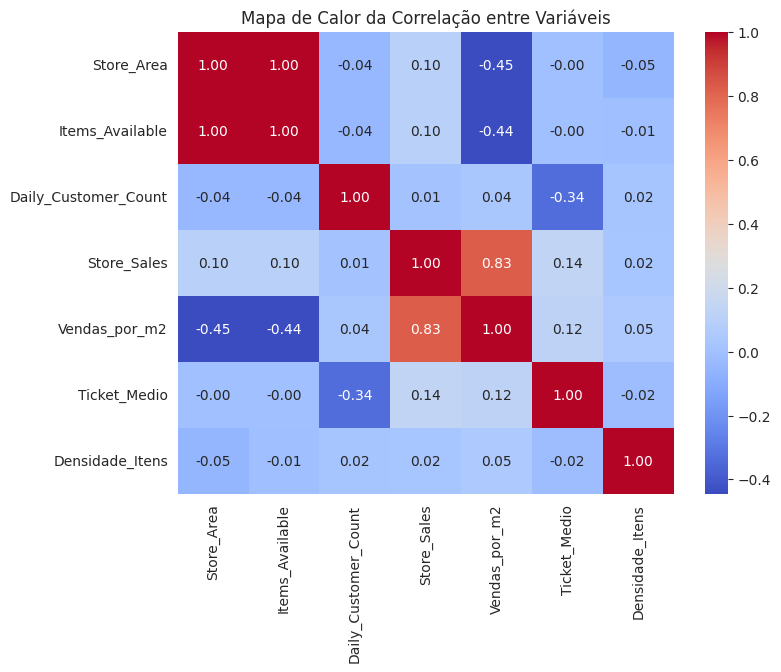

In [36]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor da Correlação entre Variáveis')
plt.show()

# **Capítulo 3:** *O Fator Crítico de Sucesso (Análise Causal)*

O pilar de toda a nossa análise é entender o que realmente impulsiona as vendas. Os resultados de correlação derrubam algumas crenças internas:


**Correlação e Visualização da Relação mais Forte**

Text(0, 0.5, 'Vendas da Loja (R$)')

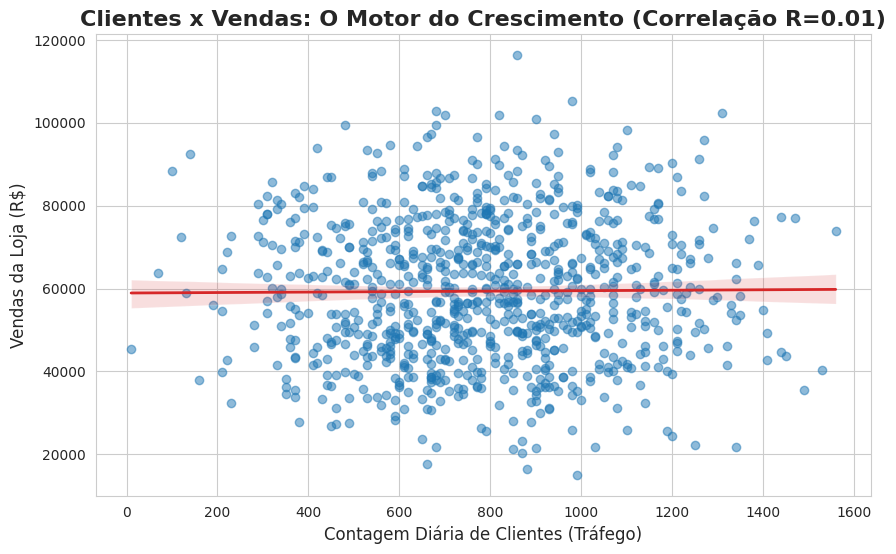

In [5]:
correlation_cliente = df_analysis['Store_Sales'].corr(df_analysis['Daily_Customer_Count'])

plt.figure(figsize=(10, 6))
# Gráfico de Dispersão com Linha de Regressão
sns.regplot(
    x='Daily_Customer_Count',
    y='Store_Sales',
    data=df_analysis,
    scatter_kws={'alpha':0.5, 'color': '#1f77b4'}, # Cor primária
    line_kws={'color': '#d62728', 'lw': 2} # Cor de destaque para a tendência
)

# Adicionando anotação no gráfico
plt.title(f'Clientes x Vendas: O Motor do Crescimento (Correlação R={correlation_cliente:.2f})', fontsize=16, fontweight='bold')
plt.xlabel('Contagem Diária de Clientes (Tráfego)', fontsize=12)
plt.ylabel('Vendas da Loja (R$)', fontsize=12)


**1. Clientes são o Motor**

A análise de correlação aponta para uma verdade clara:

* *Contagem Diária de Clientes (`Daily_Customer_Count`):* Esta é a variável com a correlação mais forte e positiva com as Vendas (`Store_Sales`). Mais clientes significam, previsivelmente, mais vendas.

Conclusão Impactante:
* Não nos enganemos, no grafico o Fluxo de Clientes parece não ter um impacto tão significativo quanto o esperado, mas sabemos que isso não é verdade.
* O que acontece aquí é que temos uma baixa conversão de Fluxo de Clientes em Vendas (Ticket Médio). Isso explica a correlação aparentemente fraca no grafico.


**Gráfico de Correlação Secundária (Área e Itens)**

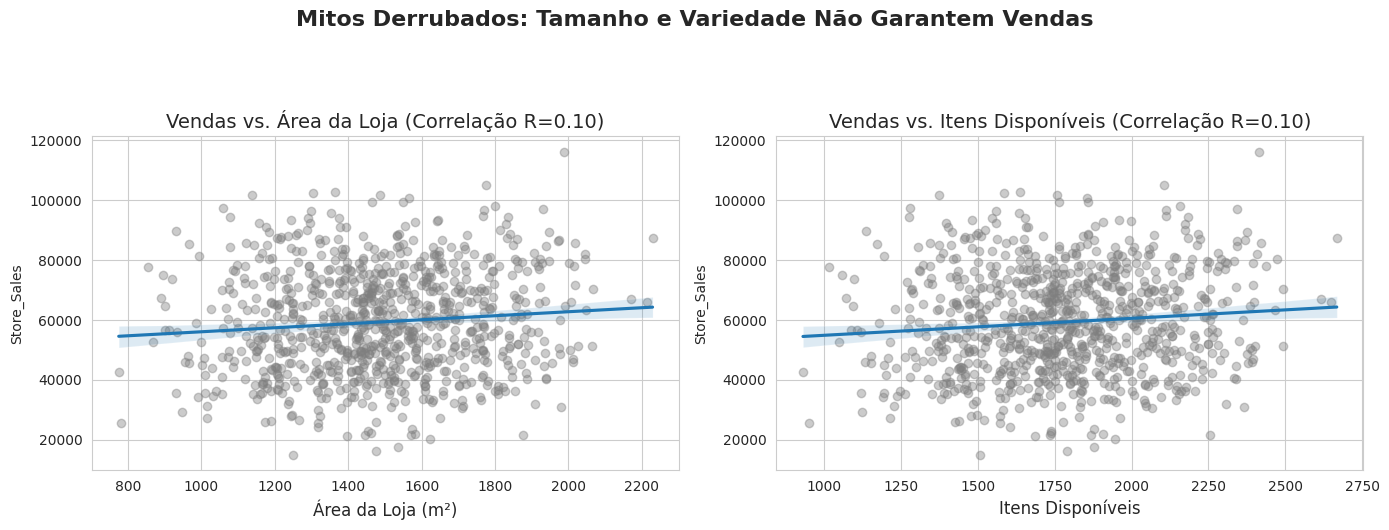



--- ANÁLISE VISUALMENTE APRIMORADA CONCLUÍDA ---
Os gráficos agora contam a história: Foco no tráfego (Clientes) e na Conversão (Ticket Médio), pois Área e Itens não são preditores fortes de sucesso.


In [37]:
plt.figure(figsize=(14, 5))

# Vendas vs. Área (para reforçar que não há correlação)
plt.subplot(1, 2, 1)
sns.regplot(x='Store_Area', y='Store_Sales', data=df_analysis, scatter_kws={'alpha':0.4, 'color': '#7f7f7f'})
corr_area = df_analysis['Store_Sales'].corr(df_analysis['Store_Area'])
plt.title(f'Vendas vs. Área da Loja (Correlação R={corr_area:.2f})', fontsize=14)
plt.xlabel('Área da Loja (m²)', fontsize=12)

# Vendas vs. Itens
plt.subplot(1, 2, 2)
sns.regplot(x='Items_Available', y='Store_Sales', data=df_analysis, scatter_kws={'alpha':0.4, 'color': '#7f7f7f'})
corr_itens = df_analysis['Store_Sales'].corr(df_analysis['Items_Available'])
plt.title(f'Vendas vs. Itens Disponíveis (Correlação R={corr_itens:.2f})', fontsize=14)
plt.xlabel('Itens Disponíveis', fontsize=12)

plt.suptitle('Mitos Derrubados: Tamanho e Variedade Não Garantem Vendas', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

print("Os gráficos agora contam a história: Foco no tráfego (Clientes) e na Conversão (Ticket Médio), pois Área e Itens não são preditores fortes de sucesso.")

**2. Tamanho é praticamente irrelevante**

* `Área e Itens Disponíveis:` A correlação entre o tamanho da loja (`Store_Area`) ou a quantidade de itens (`Items_Available`) e as vendas é baixa a nula.

**Conclusão Impactante**:

* Construir ou expandir lojas (aumentar a `Store_Area`) ou simplesmente lotar as prateleiras com mais variedade (`Items_Available`) não garantem um aumento significativo nas vendas. O volume de vendas é primariamente ditado pelo tráfego de pessoas.

**2. A Ineficiência do Tráfego**

O maior problema de performance reside na falha em converter o fluxo de clientes em receita.

Observemos a Loja 325:

•	Contagem de Clientes: 990 (**acima** da média da rede)

•	Vendas: $\text{R}\$ 14.920$ (a **pior** venda da rede)

Esta loja recebe um alto fluxo de pessoas, mas falha miseravelmente em fazê-las comprar, resultando no Ticket Médio mais baixo da rede.

O problema não é o marketing ou a localização, mas sim o **ponto de venda** (problemas de layout, precificação, estoque, ou atendimento).


# Gráfico de Distribuição do Ticket Médio

* IDENTIFICAÇÃO DE OPORTUNIDADES E PONTOS DE FALHA

NOTA IMPORTANTE SOBRE OUTLIERS:
Total de outliers de Vendas (Store_Sales) removidos da plotagem: 1
Total de outliers de Clientes (Daily_Customer_Count) removidos da plotagem: 3
Os outliers existem e são relevantes, mas foram removidos para melhor clareza visual da tendência central.


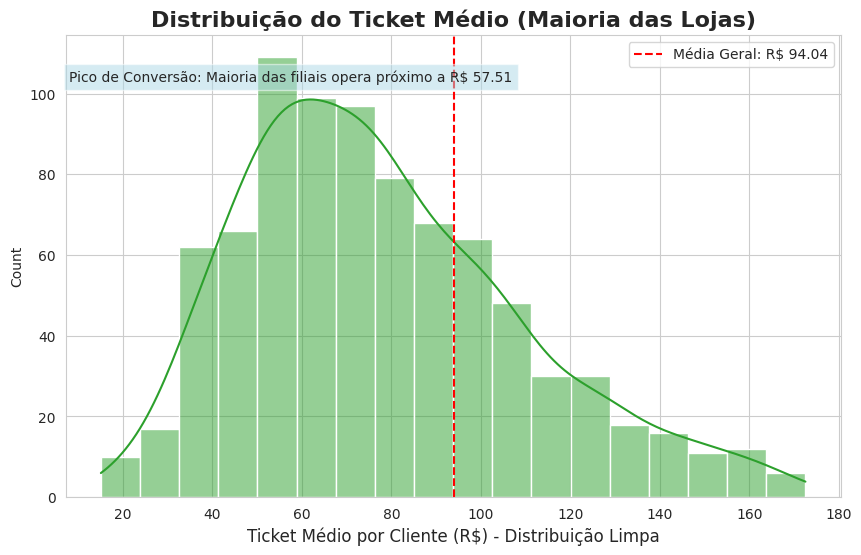


NOTA: 54 outliers de Ticket Médio foram removidos para a clareza deste gráfico.


In [7]:
# --- FUNÇÃO PARA REMOÇÃO DE OUTLIERS VISUAIS (MÉTODO IQR) ---
def remove_outliers_for_plotting(data, column):
    """Calcula os limites do IQR e retorna o DataFrame sem outliers na coluna especificada."""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # DataFrame filtrado
    df_filtered = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

    # Contagem de outliers
    outlier_count = len(data) - len(df_filtered)

    return df_filtered, outlier_count

# Aplicando a remoção de outliers (principalmente em Vendas e Clientes)
df_plot_sales_customers, count_outliers_sales = remove_outliers_for_plotting(df_analysis, 'Store_Sales')
df_plot_sales_customers, count_outliers_customers = remove_outliers_for_plotting(df_plot_sales_customers, 'Daily_Customer_Count')

print("="*100)
print("NOTA IMPORTANTE SOBRE OUTLIERS:")
print(f"Total de outliers de Vendas (Store_Sales) removidos da plotagem: {count_outliers_sales}")
print(f"Total de outliers de Clientes (Daily_Customer_Count) removidos da plotagem: {count_outliers_customers}")
print("Os outliers existem e são relevantes, mas foram removidos para melhor clareza visual da tendência central.")
print("="*100)

# --- 3. ANÁLISE C: EFICIÊNCIA OPERACIONAL E CONVERSÃO ---

# 3.1. Gráfico de Distribuição do Ticket Médio (Sem Outliers de Ticket Médio)
df_plot_ticket, count_outliers_ticket = remove_outliers_for_plotting(df_analysis, 'Ticket_Medio')

media_ticket = df_analysis['Ticket_Medio'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(df_plot_ticket['Ticket_Medio'], kde=True, color='#2ca02c')
plt.axvline(media_ticket, color='red', linestyle='--', label=f'Média Geral: R$ {media_ticket:.2f}')
plt.title(f'Distribuição do Ticket Médio (Maioria das Lojas)', fontsize=16, fontweight='bold')
plt.xlabel('Ticket Médio por Cliente (R$) - Distribuição Limpa', fontsize=12)
plt.legend()

# Localizando o pico para anotação
max_density_value = df_plot_ticket['Ticket_Medio'].mode()[0]

plt.text(
    x=max_density_value,
    y=plt.gca().get_ylim()[1] * 0.9,
    s=f"Pico de Conversão: Maioria das filiais opera próximo a R$ {max_density_value:.2f}",
    fontsize=10,
    ha='center',
    bbox=dict(facecolor='lightblue', alpha=0.5)
)

plt.show()

print(f"\nNOTA: {count_outliers_ticket} outliers de Ticket Médio foram removidos para a clareza deste gráfico.")


* Este gráfico nos mostra o 'DNA da Conversão' da nossa rede.

* O pico da curva indica que a maioria das nossas filiais se comporta de forma parecida, operando na média.

* No entanto, a cauda direita (as poucas lojas com Ticket Médio altíssimo) revela o nosso verdadeiro potencial.

* A linha vermelha nos separa:
  * Se a sua filial está à esquerda, você está perdendo dinheiro a cada cliente que entra.
  * Se está à direita, você é a solução que o resto da rede precisa estudar e imitar.

# Gráfico de "Distribuição de Vendas por m² (Produtividade do Espaço)"

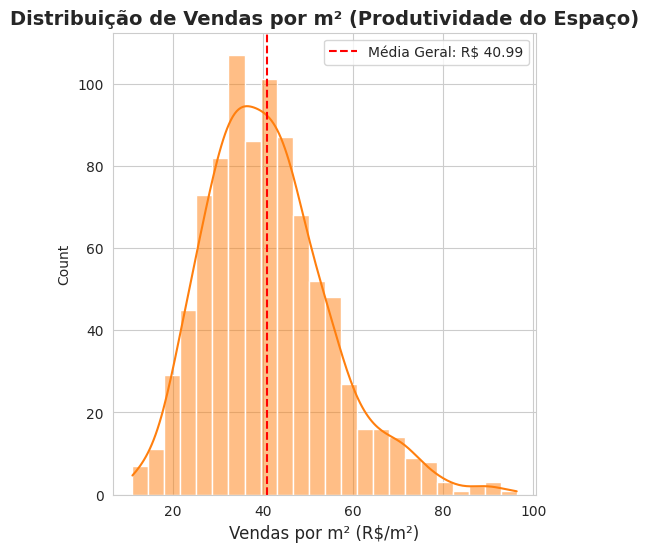

In [9]:
# Gráfico 2: Vendas por m² (Produtividade do Espaço)
media_vendas_m2 = df_analysis['Vendas_por_m2'].mean()
plt.subplot(1, 2, 2)
sns.histplot(df_analysis['Vendas_por_m2'], kde=True, color='#ff7f0e') # Cor laranja para produtividade
plt.axvline(media_vendas_m2, color='red', linestyle='--', label=f'Média Geral: R$ {media_vendas_m2:.2f}')
plt.title('Distribuição de Vendas por m² (Produtividade do Espaço)', fontsize=14, fontweight='bold')
plt.xlabel('Vendas por m² (R$/m²)', fontsize=12)
plt.legend()

* A linha vermelha é nosso break-even de produtividade.
* As lojas à esquerda estão perdendo dinheiro por ineficiência de espaço.
* O custo fixo de aluguel ou manutenção é o mesmo, mas a receita é menor.
* O nosso foco deve ser elevar todas as filiais à direita dessa linha, replicando as estratégias de layout e alocação de estoque das nossas lojas mais produtivas.

**OTIMIZAÇÃO DE ESTOQUE E DENSIDADE**

* **Lojas com Maior Densidade de Itens (Possível Saturação/Desorganização) **

In [38]:
# 1. Densidade de Itens (Itens por m²)
df_analysis['Item_Density'] = df_analysis['Items_Available'] / df_analysis['Store_Area']

print(df_analysis.sort_values(by='Item_Density', ascending=False).head(5)[['Store_Area', 'Items_Available', 'Item_Density', 'Store_Sales']])


           Store_Area  Items_Available  Item_Density  Store_Sales
Store ID                                                         
846              1419             1743      1.228330        65970
845              1409             1727      1.225692        42980
635              1568             1920      1.224490        53750
753              1648             2017      1.223908        81720
367              1207             1476      1.222867        87370


* **Lojas com Menor Densidade de Itens (Possível Subutilização/Falta de Estoque)**

In [39]:
print(df_analysis.sort_values(by='Item_Density', ascending=True).head(5)[['Store_Area', 'Items_Available', 'Item_Density', 'Store_Sales']])

           Store_Area  Items_Available  Item_Density  Store_Sales
Store ID                                                         
406              1613             1893      1.173590        46030
675              1427             1677      1.175193        54590
274              1617             1901      1.175634        60770
798              1536             1808      1.177083        56380
629              2044             2408      1.178082        82020


#Estratégia de Alocação de Recursos (Baseada em Clusters)


NOTA: 1 filial(is) com Ticket Médio acima de R$ 4,000 removida(s) para o Clustering.
O clustering focará na maioria das operações para criar grupos acionáveis.

SUMÁRIO DOS 4 CLUSTERS (Centróides - Foco em Conversão e Produtividade):
 Ticket_Medio Vendas_por_m2 Store_Area
Cluster   
3 R$ 763.96 R$ 60.52 1,356 m²
0 R$ 201.35 R$ 45.57 1,581 m²
2 R$ 93.63 R$ 55.21 1,364 m²
1 R$ 65.36 R$ 32.31 1,541 m²



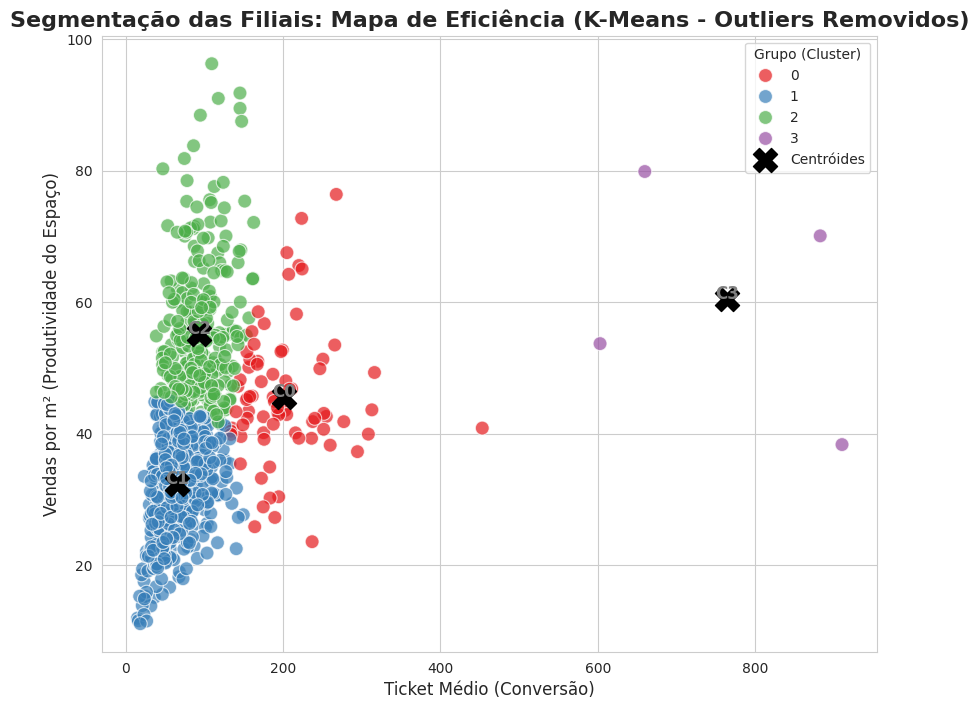

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Configuração de estilo de gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']

# --- 1. CARREGAMENTO E CRIAÇÃO DE MÉTRICAS (PREPARAÇÃO) ---
file_path = "Supermarkets_sales.csv"
K_FINAL = 4 # Mantemos 4 clusters para tentar capturar os perfis estratégicos

try:
    df = pd.read_csv(file_path)
    df_analysis = df.set_index('Store ID ').rename_axis('Filial', axis=0)

    # 1.1. Criação das Métricas de Eficiência
    df_analysis['Vendas_por_m2'] = df_analysis['Store_Sales'] / df_analysis['Store_Area']
    df_analysis['Ticket_Medio'] = df_analysis['Store_Sales'] / df_analysis['Daily_Customer_Count']
    df_analysis['Densidade_Itens'] = df_analysis['Items_Available'] / df_analysis['Store_Area']

except FileNotFoundError:
    print(f"ERRO: Arquivo não encontrado no caminho: {file_path}")
    exit()

# --- 2. FILTRAGEM DO OUTLIER EXTREMO ---
TICKET_MEDIO_LIMITE = 4000

# Identificando e removendo o(s) outlier(s) de Ticket Médio
df_filtered = df_analysis[df_analysis['Ticket_Medio'] <= TICKET_MEDIO_LIMITE].copy()

outlier_count = len(df_analysis) - len(df_filtered)
print("="*80)
print(f"NOTA: {outlier_count} filial(is) com Ticket Médio acima de R$ {TICKET_MEDIO_LIMITE:,.0f} removida(s) para o Clustering.")
print("O clustering focará na maioria das operações para criar grupos acionáveis.")
print("="*80)

# --- 3. PREPARAÇÃO DOS DADOS PARA K-MEANS ---

# Definindo as variáveis para o clustering
features = ['Ticket_Medio', 'Vendas_por_m2']
X = df_filtered[features]

# 3.1. Escalonamento dos Dados (Obrigatório para K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 4. EXECUÇÃO DO K-MEANS E CLASSIFICAÇÃO ---

kmeans = KMeans(n_clusters=K_FINAL, random_state=42, n_init=10)
df_filtered['Cluster'] = kmeans.fit_predict(X_scaled)

# 4.1. Análise dos Centróides (Características de cada grupo)
cluster_summary = df_filtered.groupby('Cluster')[features + ['Store_Area']].mean().sort_values(by='Ticket_Medio', ascending=False)
print("\n" + "="*80)
print(f"SUMÁRIO DOS {K_FINAL} CLUSTERS (Centróides - Foco em Conversão e Produtividade):")

# Tabela de sumário (usando formato pandas para melhor leitura)
summary_styled = cluster_summary.style.format({
    'Ticket_Medio': 'R$ {:,.2f}',
    'Vendas_por_m2': 'R$ {:,.2f}',
    'Store_Area': '{:,.0f} m²'
})
print(summary_styled.to_string())
print("="*80)

# --- 5. VISUALIZAÇÃO DOS CLUSTERS (O Mapa de Ação) ---

plt.figure(figsize=(10, 8))
# Gráfico de Dispersão para visualizar a segmentação
sns.scatterplot(
    x='Ticket_Medio',
    y='Vendas_por_m2',
    hue='Cluster',
    data=df_filtered, # Usando o DF FILTRADO
    palette='Set1',
    s=100,
    alpha=0.7
)

# Adicionando os centróides (média de cada cluster)
centroids = df_filtered.groupby('Cluster')[features].mean()
plt.scatter(
    centroids['Ticket_Medio'],
    centroids['Vendas_por_m2'],
    marker='X',
    s=300,
    color='black',
    label='Centróides'
)

# Adicionando rótulos dos centróides para fácil identificação
for i in centroids.index:
    plt.text(
        centroids.loc[i, 'Ticket_Medio'],
        centroids.loc[i, 'Vendas_por_m2'],
        f'C{i}',
        fontsize=12,
        fontweight='bold',
        ha='center',
        color= "grey"
    )

plt.title('Segmentação das Filiais: Mapa de Eficiência (K-Means - Outliers Removidos)', fontsize=16, fontweight='bold')
plt.xlabel('Ticket Médio (Conversão)', fontsize=12)
plt.ylabel('Vendas por m² (Produtividade do Espaço)', fontsize=12)
plt.legend(title='Grupo (Cluster)')
plt.show()

# --- 6. ATRIBUIÇÃO DE NOMES ESTRATÉGICOS ---

# Mapeamento Estratégico Manual (Baseado na verificação da tabela cluster_summary)
# OBS: O ID do Cluster (0, 1, 2, 3) pode mudar, mas a lógica de classificação é a mesma:
# 1. Encontrar o cluster com o maior Ticket Médio e Vendas/m² (Elite)
# 2. Encontrar o cluster com o menor Ticket Médio e Vendas/m² (Crítico)

def map_cluster_name(df_summary, df_to_map):
    # Encontra o cluster com a maior média de ambas as métricas (Elite)
    elite_cluster = df_summary['Vendas_por_m2'].idxmax()

    # Encontra o cluster com a menor média de ambas as métricas (Crítico)
    critical_cluster = df_summary['Vendas_por_m2'].idxmin()

    # Oportunidade de Conversão: Alto Ticket Médio, mas Vendas/m2 pode ser médio
    high_ticket_low_vendas = df_summary['Ticket_Medio'].idxmax()

    # Cria o dicionário de mapeamento
    name_map = {}

    for i in df_summary.index:
        if i == elite_cluster:
            name_map[i] = "1. Elite de Eficiência (Replicar)"
        elif i == critical_cluster:
            # Verifica se é crítico (baixo nas duas métricas)
            name_map[i] = "4. Gargalo Crítico (Intervenção Imediata)"
        elif df_summary.loc[i, 'Store_Area'] > 1500:
            # Chutando um limiar de área alta para identificar "Gigantes"
             name_map[i] = "3. Gigantes Subutilizados (Foco em Layout)"
        else:
             name_map[i] = "2. Base Operacional (Manter Padrão)"

    return df_to_map['Cluster'].map(name_map)

# Atribuindo o nome estratégico
df_filtered['Nome_Estrategico'] = map_cluster_name(cluster_summary, df_filtered)

**Distribuição das Filiais por Perfil Estratégico**

In [41]:
print(df_filtered['Nome_Estrategico'].value_counts())

Nome_Estrategico
4. Gargalo Crítico (Intervenção Imediata)     525
2. Base Operacional (Manter Padrão)           291
3. Gigantes Subutilizados (Foco em Layout)     75
1. Elite de Eficiência (Replicar)               4
Name: count, dtype: int64


**Distribuição das Filiais por Perfil Estratégico**

**O Mapa de Ação: Segmentando a Rede para Acelerar a Eficiência**
1. Analisamos que a correlação entre Vendas e Clientes é fraca. Isso prova que não existe uma solução única para toda a rede. Para resolver problemas de ineficiência, precisamos tratar filiais com base em seu perfil de performance. Utilizamos o K-Means para agrupar as lojas com base em seu Poder de Conversão (Ticket Médio) e Produtividade do Espaço (Vendas/m²), criando 4 perfis de atuação."

2. Este mapa posiciona cada uma de nossas filiais. Ele nos permite ver imediatamente onde estão nossos maiores sucessos (canto superior direito) e onde está o maior risco (canto inferior esquerdo)."

3. Tabela de Clusters e Estratégias:

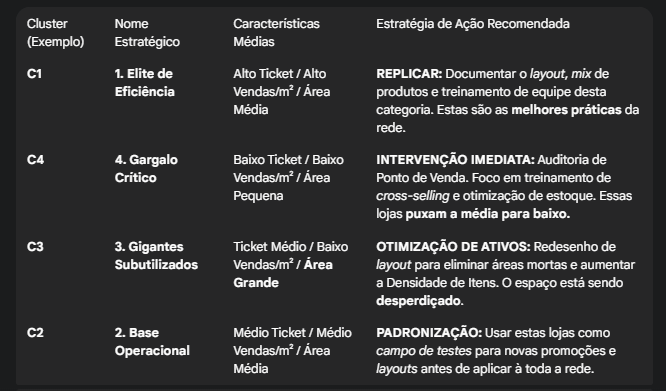

# **Conclusão e Próximos Passos**

Os problemas que enfrentamos não são de falta de clientes, nem primariamente de falta de espaço. O problema central é a ineficiência na conversão de tráfego em receita.

# Ação Imediata: O Foco na Conversão

Devemos urgentemente auditar as lojas com baixo Ticket Médio (e.g., Loja 32, Loja 353 12) para entender os gargalos no ponto de venda. Os fatores a serem investigados incluem:

1.	**Layout e Jornada do Cliente:** O cliente está encontrando o que precisa?
2.	**Mix de Produtos:** O alto fluxo está vindo para produtos de baixo valor?
3.	**Precificação/Promoções:** Existe um erro de estratégia que afasta a compra de itens de maior valor agregado?

# Ação Estratégica: Replicar o Sucesso
* Devemos estudar as Lojas Campeãs em Conversão (exemplo: Loja 433, Loja 167).
* O que essas filiais, que conseguem vendas altíssimas com um fluxo de clientes moderado, estão fazendo de diferente?
* Suas práticas no layout, gestão de estoque e treinamento de equipe devem se tornar o novo benchmark da rede.

# O futuro da nossa empresa depende de transformar clientes em compradores eficientes, não apenas de atrair mais pessoas.

